In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [3]:
data = pd.read_csv('3.12.+Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### Plot The Data

In [4]:
x = data.copy()

In [6]:
kmeans = KMeans(2,n_init=10)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10)

### Clustering

In [8]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

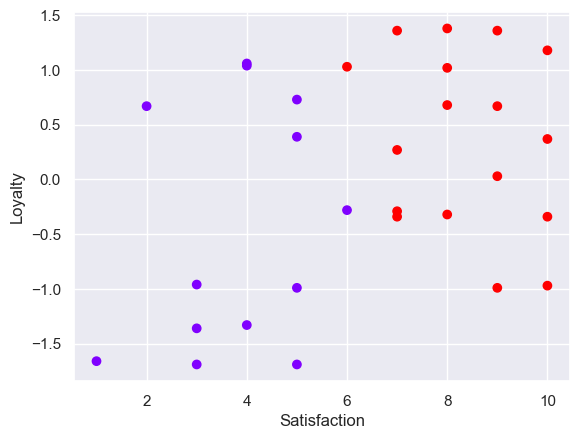

In [11]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Standardization

In [13]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Elbow Method

In [18]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packa

In [19]:
wcss

[60.0,
 29.818973034723143,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091781,
 5.4602053116458205,
 4.430999057496253,
 3.901327790065408]

Text(0.5, 0, 'Number of Clusters')

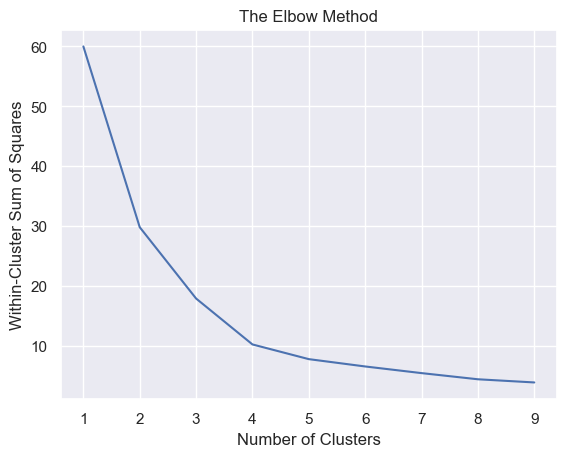

In [20]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xlabel('Number of Clusters')

### Exploring the number of Cluster

In [28]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)



/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

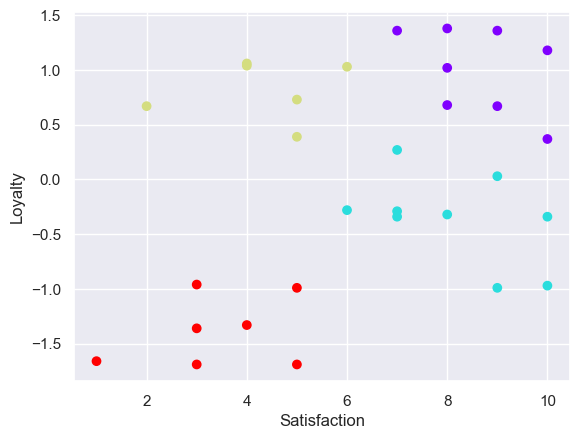

In [29]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')